#**Week 9 - Q&A Activity on Testing of Hypothesis**

*  Carry out Descriptive Analytics on the dataset.
*  Check whether female and male students scored the same marks
*  Whether the test preparation helps the students?

######***Importing necessary libraries***

In [ ]:
pip install scipy --upgrade

     |████████████████████████████████| 38.1 MB 1.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


##**Carry out Descriptive Analytics on the dataset**

######***Reading dataset Week_8_Q&A_dataset - Sheet1.csv in to Python Environment using read_csv(). The first 5 observations are displayed.***

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/Week_8_Q&A_dataset - Sheet1.csv')
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


######***Finding the no: of Observations***

In [ ]:
df.shape

(28, 3)

######***Checking for null values***

In [ ]:
df[df.isna().any(axis=1)]

,Gender,Test preparation,Total Marks


##**Insights:**


*   The dataset contains the details of the students such as - Gender, Test Preparation, Total marks.
*   **28 Observations** and **3 Features** are found.
*   **No Null** values are recorded.
*  The datatype for the feature - Total marks is given as Integer datatype with 64-bit, whereas, the other features - Gender, Test preparation are given as Objects.

######***Plotting a Pie-Chart for the feature - Gender***

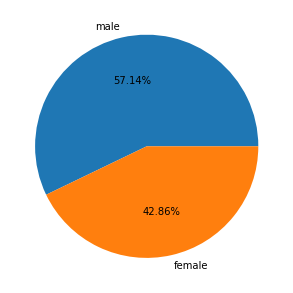

In [ ]:
fig = plt.figure(figsize =(5, 7))
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].unique(), autopct='%1.2f%%')
plt.show()

##**Insights**:


*   **57.14%** of the students are **Male**
*   **42.86%** of the students are **Female**
> _Most of the students are **Male**_

######***Plotting Countplot for the features - Test preparation and Gender***

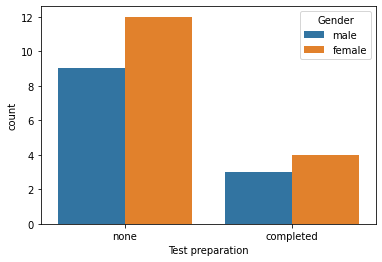

In [ ]:
sns.countplot(x='Test preparation', hue='Gender', data = df)

##**Insights:**
*   As visible from the above plot, we can see that, a few have completed Test preparation course.
*   Among the students, female students are out numbered than males in both completing as well as not completing the test preparation course





##**Check whether female and male students scored the same marks**

In [ ]:
df[['Total Marks','Gender']].groupby('Gender').describe()

Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

In [ ]:
sample_female=df[(df['Gender'] == 'female')]
sample_male=df[(df['Gender'] == 'male')]

######***Plotting a kde plot for the features Total Marks with Gender***

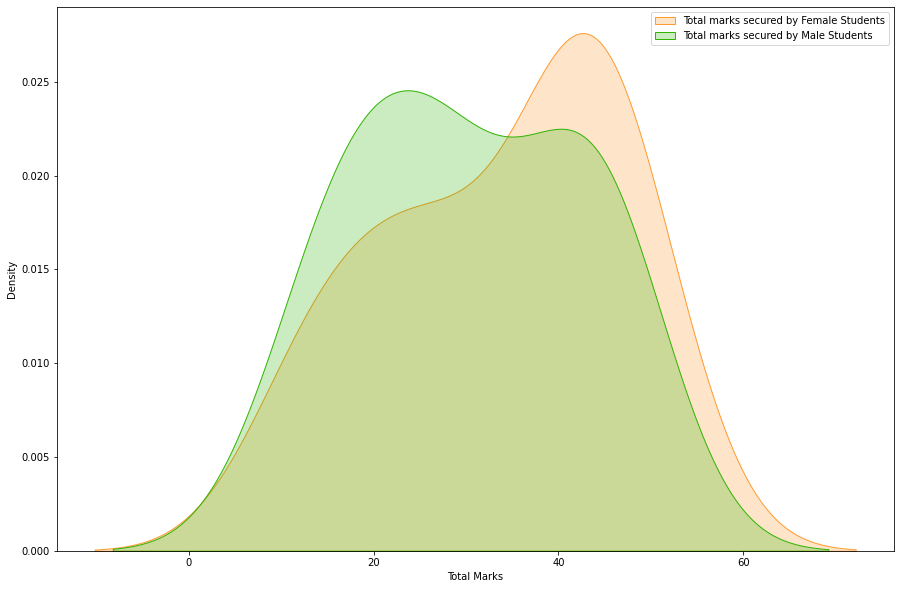

In [ ]:
plt.figure(figsize=(15, 10))
sns.kdeplot(sample_female['Total Marks'], label="Total marks secured by Female Students", shade = True, color = '#FE9A2E')
sns.kdeplot(sample_male['Total Marks'], label="Total marks secured by Male Students", shade = True, color = '#31B404')
plt.legend();

> ***Define Hypotheses***
*   The Null Hypothesis, ***H(0) - Female and Male students scored same marks***
*   The Alternative Hypothesis, ***H(a) - Female and Male students scored different marks***
*   Significance level = 5%
*   Here, we are doing **Two Tailed T - Test**




In [ ]:
ttest,pval = stats.ttest_ind(sample_female['Total Marks'], sample_male['Total Marks'], alternative='two-sided')
print('Test statistic is:',ttest)
print('P-value for Two tailed test is:', pval)
if(pval<=0.05):
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

Test statistic is: 0.6940885268848668
P-value for Two tailed test is: 0.4937822317960763
We accept null hypothesis


##**Insights:**


> _Since the **P-Value is greater than the level of significance** , we accept our Null Hypothesis. Thus, we conclude that - **Female and Male students scored same marks**_



##**Whether the test preparation helps the students?**

In [ ]:
df[['Total Marks','Test preparation']].groupby('Test preparation').describe()

Total Marks                        ...                  
                       count       mean        std  ...   50%   75%   max
Test preparation                                    ...                  
completed                7.0  44.571429   3.359422  ...  44.0  46.0  50.0
none                    21.0  28.238095  11.661495  ...  27.0  38.0  48.0

[2 rows x 8 columns]

In [ ]:
sample_completed=df[(df['Test preparation'] == 'completed')]
sample_none=df[(df['Test preparation'] == 'none')]

######***Plotting a kde plot for the features Total Marks with Test Preparation***

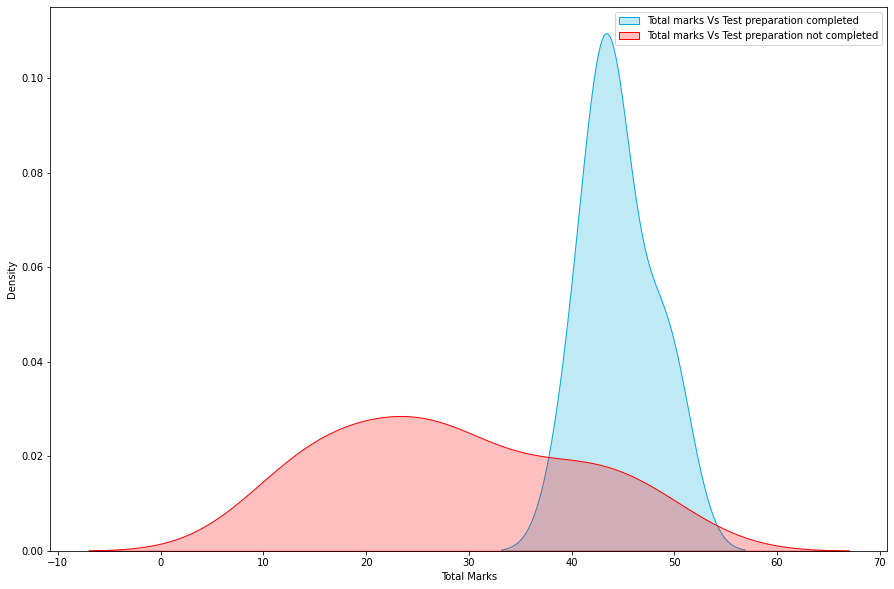

In [ ]:
plt.figure(figsize=(15, 10))
sns.kdeplot(sample_completed['Total Marks'], label="Total marks Vs Test preparation completed", shade = True, color = '#01A9DB')
sns.kdeplot(sample_none['Total Marks'], label="Total marks Vs Test preparation not completed", shade = True, color = '#FF0000')
plt.legend();

######***Testing of Hypothesis***

> ***Define Hypotheses***
*   The Null Hypothesis, ***H(0) - The Test preparation didn't helped the students***
*   The Alternative Hypothesis, ***H(a) - The Test preparation helped the students***
*   Significance level = 5%
*   Here, We are doing **One Tailed T Test**

In [ ]:
ttest,pval = stats.ttest_ind(sample_completed['Total Marks'], sample_none['Total Marks'], alternative='greater')
print('Test statistic is:',ttest)
print('P-value for One tailed test is:', pval)
if(pval<=0.05):
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

Test statistic is: 3.6143637527769217
P-value for One tailed test is: 0.0006335646228660053
We reject null hypothesis


##**Insights:**


> _Since the **P-value is smaller than the significance level**, we accept our Alternative Hypothesis. Thus, We conclude that - **The Test preparation helped the students**_

